In [2]:
library("igraph")
library("dplyr")
# library("ggtree",lib.loc = '../../../R-pkgs/')
library('ggplot')


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union



Attaching package: ‘dplyr’


The following objects are masked from ‘package:igraph’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




ERROR: Error in library("ggplot"): there is no package called ‘ggplot’


In [3]:
el = read_graph('../../data/processed/mta-elevators.graphml',format = 'graphml')

In [4]:
el

IGRAPH beac59a U--- 1100 1084 -- 
+ attr: station (v/c), label (v/c), node_type (v/c), id (v/c)
+ edges from beac59a:
 [1]  1-- 3  1-- 4  2-- 3  2-- 4  2-- 6  2--12  2--22  5-- 6  5-- 7  5-- 8
[11]  5-- 9  5--10 11--12 11--13 11--14 11--15 11--16 11--17 11--18 11--19
[21] 11--20 21--22 21--23 21--24 21--25 21--26 27--29 27--33 28--29 28--30
[31] 28--31 32--33 32--34 32--35 36--38 37--38 37--40 37--45 39--40 39--41
[41] 39--42 39--43 44--45 44--46 44--47 44--48 49--51 50--51 50--53 50--59
[51] 50--63 52--53 52--54 52--55 52--56 52--57 58--59 58--60 58--61 62--63
[61] 62--64 62--65 62--66 62--67 68--70 68--74 69--70 69--71 69--72 73--74
[71] 73--75 73--76 77--79 78--79 78--81 78--84 78--88 78--92 80--81 80--82
+ ... omitted several edges

In [5]:
head(V(el)$station)

[1] "125 St" "125 St" "125 St" "125 St" "125 St" "125 St"

In [6]:
unique(get.vertex.attribute(el,'node_type'))

[1] "Street"          "Mezzanine"       "Elevator"        "Platform"       
 [5] "Train"           "Lower Mezzanine" "Upper Mezzanine" "Unknown"        
 [9] "Mezzanine 401"   "Mezzanine 444"   "Mezzanine A"     "Mezz"           
[13] "Path Mezzanine"  "Mezzanine B"     "Mezzanine C1M"   "Mezzanine C1"   
[17] "Mezzanine C2M"   "Mezzanine C2"

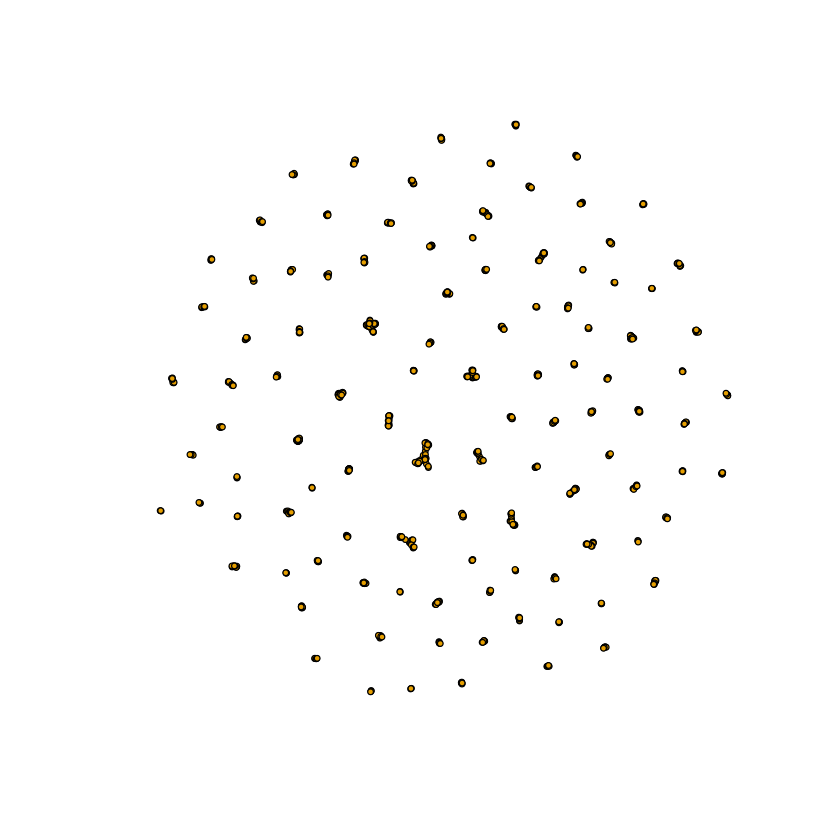

In [7]:
plot(el,vertex.size=2,vertex.label=NA)

In [8]:
comp = components(el)
V(el)$component <- comp$membership

In [9]:
mapcolors <- function(x){
    if(x=="Elevator"){
        return("lightblue")
    }else if(x=='Street'){
        return("orange")
    }else if(x=="Platform"){
        return("white")
    }else if(grepl(pattern = "Mezzanine",x = x)){
        return("yellow")
    }else if(x=="Train"){
        return("red")
    }else {
        return("black")
    }
}

In [10]:
cols <- sapply(V(el)$node_type,FUN=mapcolors,simplify = TRUE)
V(el)$color <- cols

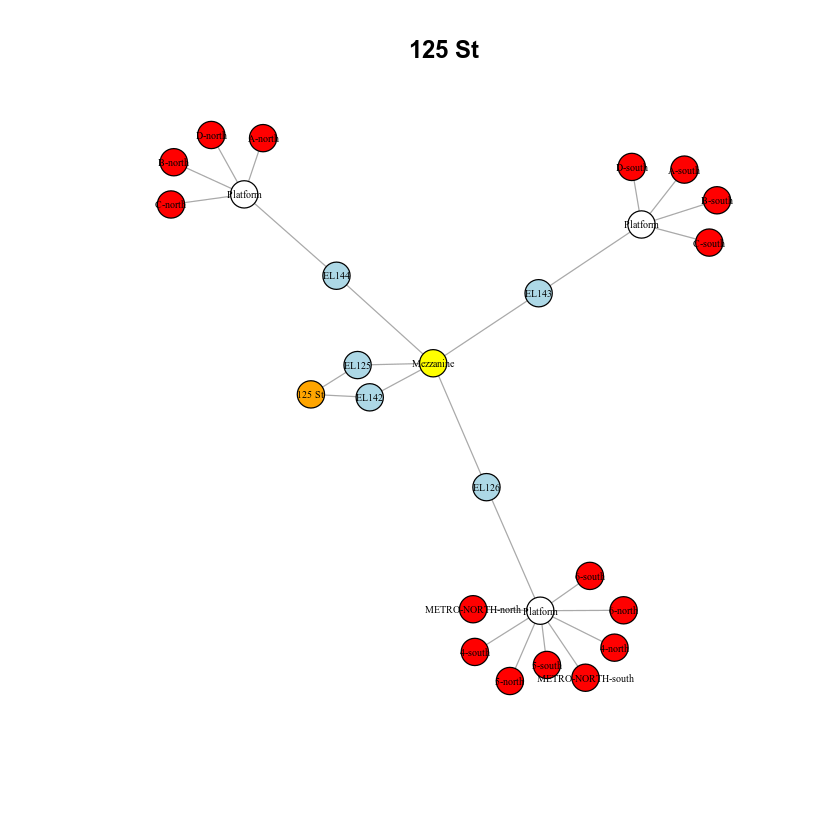

In [11]:
g <- induced_subgraph(el,V(el)[V(el)$component == 1])
plot(g,color=V(g)$color,vertex.size=10,vertex.label.cex=0.5,vertex.label.color='black',main=V(g)$label[V(g)$node_type=="Street"])

In [12]:
ee <- read.csv('../../data/interim/crosswalks/EE_master_list.csv',stringsAsFactors = F)

In [45]:
head(ee[grepl(pattern = "Jac",ee$station_name),])

,X,station_name,equipment_id,description,borough,subway_lines,equipment_type,ada_compliant,is_active,direction,subset_lines,connection_to_street,st_name_opd_format,line,notes,geometry,lat,lon
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
420,419,Jackson Hts - Roosevelt Av,ES449,Lower Mezzanine to Upper Mezzanine,QNS,E/F/M/R/7,ES,N,Y,,E/F/M/R/7,N,Jackson Hts - Roosevelt Av,E-F-M-R,"E,F-all times, M-weekdays and evenings, R-all times exc nights",POINT (-73.89129866519697 40.74653969115889),40.74654,-73.8913
421,420,Jackson Hts - Roosevelt Av,ES453,Lower Mezzanine to Upper Mezzanine,QNS,E/F/M/R/7,ES,N,Y,,E/F/M/R/7,N,Jackson Hts - Roosevelt Av,E-F-M-R,"E,F-all times, M-weekdays and evenings, R-all times exc nights",POINT (-73.89129866519697 40.74653969115889),40.74654,-73.8913
422,421,Jackson Hts - Roosevelt Av,ES452,Lower Mezzanine to Upper Mezzanine,QNS,E/F/M/R/7,ES,N,Y,,E/F/M/R/7,N,Jackson Hts - Roosevelt Av,E-F-M-R,"E,F-all times, M-weekdays and evenings, R-all times exc nights",POINT (-73.89129866519697 40.74653969115889),40.74654,-73.8913
423,422,Jackson Hts - Roosevelt Av,ES451,Lower Mezzanine to Upper Mezzanine,QNS,E/F/M/R/7,ES,N,Y,,E/F/M/R/7,N,Jackson Hts - Roosevelt Av,E-F-M-R,"E,F-all times, M-weekdays and evenings, R-all times exc nights",POINT (-73.89129866519697 40.74653969115889),40.74654,-73.8913
424,423,Jackson Hts - Roosevelt Av,ES450,Lower Mezzanine to Upper Mezzanine,QNS,E/F/M/R/7,ES,N,Y,,E/F/M/R/7,N,Jackson Hts - Roosevelt Av,E-F-M-R,"E,F-all times, M-weekdays and evenings, R-all times exc nights",POINT (-73.89129866519697 40.74653969115889),40.74654,-73.8913
425,424,Jackson Hts - Roosevelt Av,EL422,Mezzanine to Platform for Forest Hills and Jamaica bound E/F/M/R service,QNS,E/F/M/R/7,EL,Y,Y,,E/F/M/R/7,N,Jackson Hts - Roosevelt Av,E-F-M-R,"E,F-all times, M-weekdays and evenings, R-all times exc nights",POINT (-73.89129866519697 40.74653969115889),40.74654,-73.8913


In [14]:
pdf('../../reports/figures/station_graphs.pdf')
par(mfrow=c(2,2),mar=c(5.1,4.1,4.1,2.1))
unique_comps = unique(V(el)$component)
incomplete_stations = vector()
for (i in unique_comps){
#     if((i-1) %% 9 == 0){
#         par(mfrow=c(3,3),mar=c(5.1,4.1,4.1,2.1))
#     }
    g <- induced_subgraph(el,V(el)[V(el)$component == i])
    if(("Street" %in% V(g)$node_type)){
        incomplete_stations <- c(incomplete_stations,V(g)$label[V(g)$node_type == "Elevator"])
        plot(g,color=V(g)$color,vertex.size=15,vertex.label.cex=0.01,vertex.label.dist=0,vertex.label.color='black',layout=layout_as_tree(g,root=V(g)[V(g)$node_type == "Street"]),main=unique(ee$station_name[ee$equipment_id %in% V(g)$label]))
    }
}
dev.off()

png 
  2

In [15]:
el_centrality <- data.frame(el_id = V(el)$label[V(el)$node_type == "Elevator"],
                            eig_cent = centr_eigen(el)$vector[V(el)$node_type == "Elevator"],
                            bw_cent = centr_betw(el)$res[V(el)$node_type == "Elevator"],stringsAsFactors = F)

In [16]:
el_centrality %>% dplyr::arrange(desc(bw_cent)) %>% head(10)

el_id,eig_cent,bw_cent
<chr>,<dbl>,<dbl>
EL304,6.218070e-18,200.0000
EL732,2.388637e-17,160.0000
EL307,2.152168e-17,155.0000
EL305,1.835600e-17,155.0000
EL126,9.384567e-17,144.0000
EL302,2.456995e-18,128.0000
EL303,0.000000e+00,128.0000
EL301,6.712440e-19,126.6667
EL306,1.736577e-17,123.3333


In [17]:
el_centrality[el_centrality$el_id %in% c("EL717X","EL718X"),]

,el_id,eig_cent,bw_cent
,<chr>,<dbl>,<dbl>
160,EL718X,7.617107e-17,28.18341
161,EL717X,5.744422e-17,28.18341


[1] "EL225" "EL226" "EL227" "EL228" "EL34X" "EL216" "EL215" "EL214"

[1]   5  75  72  72  32  50 110  50


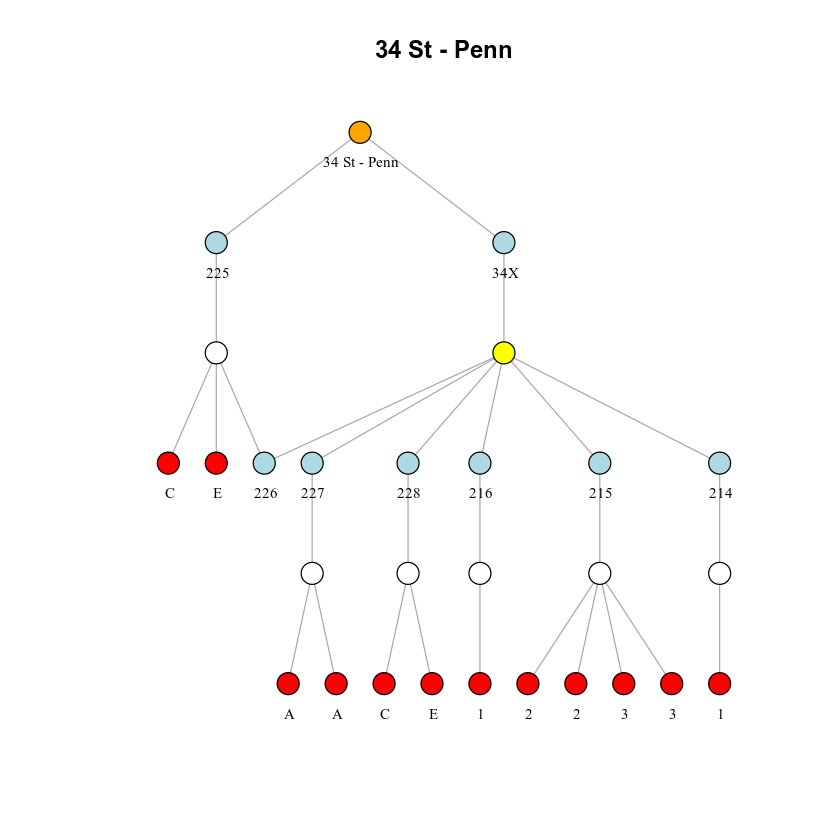

In [18]:
par(mfrow=c(1,1))
h <- induced_subgraph(el,V(el)[V(el)$component == comp$membership[V(el)$label == "EL227"]])
V(h)$label[V(h)$node_type == "Elevator"]
print(centr_betw(h)$res[V(h)$node_type == "Elevator"])
plot(h,vertex.size=8,vertex.label.degree=67.5,vertex.label=gsub(pattern="-north|-south|Platform|Upper|Lower|Mezzanine|EL",'',V(h)$label),vertex.label.cex=0.75,vertex.label.color='black',vertex.label.dist=-1.5,layout=layout_as_tree(h,root=V(h)[V(h)$node_type == "Street"]),main=unique(ee$station_name[ee$equipment_id %in% V(h)$label]))

[1] "EL276X" "EL277"  "EL280"  "EL279"  "EL278"

[1] 21.5 60.0  9.5 17.5 53.5


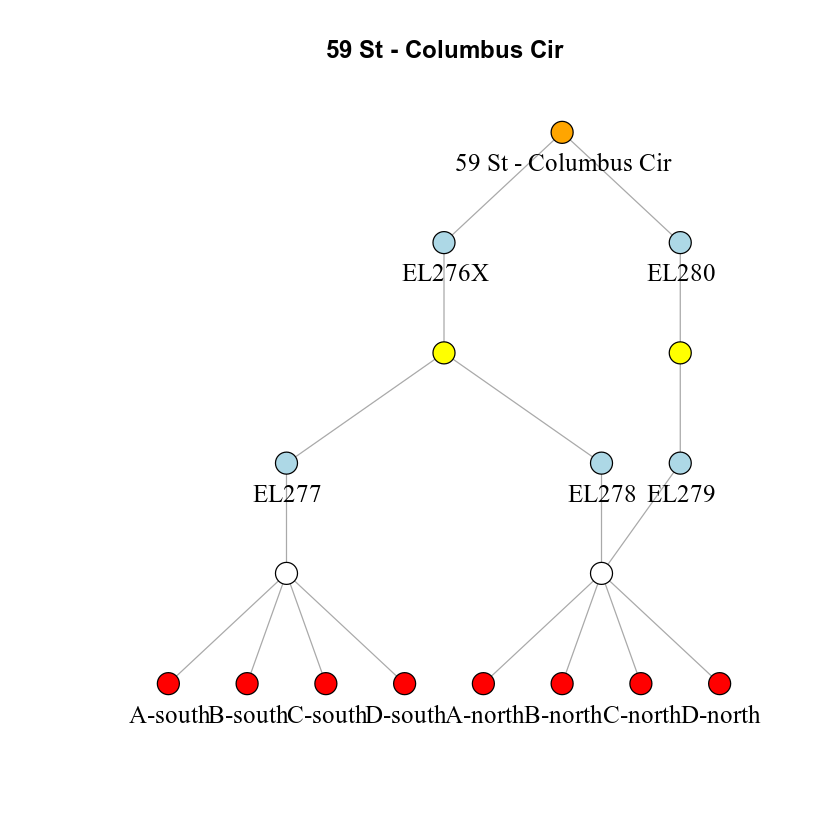

In [19]:
par(mfrow=c(1,1))
h <- induced_subgraph(el,V(el)[V(el)$component == comp$membership[V(el)$label == "EL277"]])
V(h)$label[V(h)$node_type == "Elevator"]
print(centr_betw(h)$res[V(h)$node_type == "Elevator"])
plot(h,vertex.size=8,vertex.label.degree=67.5,vertex.label=gsub(pattern="Platform|Upper|Lower|Mezzanine",'',V(h)$label),vertex.label.cex=1.25,vertex.label.color='black',vertex.label.dist=-1.5,layout=layout_as_tree(h,root=V(h)[V(h)$node_type == "Street"]),main=unique(ee$station_name[ee$equipment_id %in% V(h)$label]))

drop elevator and check connectedness of the graph

In [20]:
V(h)
V(h)$label

+ 18/18 vertices, from 244e662:
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18

[1] "59 St - Columbus Cir" "Lower Mezzanine"      "EL276X"              
 [4] "Platform"             "EL277"                "A-south"             
 [7] "B-south"              "C-south"              "D-south"             
[10] "Mezzanine"            "EL280"                "Platform"            
[13] "EL279"                "A-north"              "B-north"             
[16] "C-north"              "D-north"              "EL278"

In [21]:
all_simple_paths(h,from = V(h)[V(h)$node_type == "Street"],to =  V(h)[V(h)$node_type == "Train"])

[[1]]
+ 6/18 vertices, from 244e662:
[1] 1 3 2 5 4 6

[[2]]
+ 6/18 vertices, from 244e662:
[1] 1 3 2 5 4 7

[[3]]
+ 6/18 vertices, from 244e662:
[1] 1 3 2 5 4 8

[[4]]
+ 6/18 vertices, from 244e662:
[1] 1 3 2 5 4 9

[[5]]
+ 6/18 vertices, from 244e662:
[1]  1  3  2 18 12 14

[[6]]
+ 6/18 vertices, from 244e662:
[1]  1  3  2 18 12 15

[[7]]
+ 6/18 vertices, from 244e662:
[1]  1  3  2 18 12 16

[[8]]
+ 6/18 vertices, from 244e662:
[1]  1  3  2 18 12 17

[[9]]
+ 6/18 vertices, from 244e662:
[1]  1 11 10 13 12 14

[[10]]
+ 6/18 vertices, from 244e662:
[1]  1 11 10 13 12 15

[[11]]
+ 6/18 vertices, from 244e662:
[1]  1 11 10 13 12 16

[[12]]
+ 6/18 vertices, from 244e662:
[1]  1 11 10 13 12 17

[[13]]
+ 10/18 vertices, from 244e662:
 [1]  1 11 10 13 12 18  2  5  4  6

[[14]]
+ 10/18 vertices, from 244e662:
 [1]  1 11 10 13 12 18  2  5  4  7

[[15]]
+ 10/18 vertices, from 244e662:
 [1]  1 11 10 13 12 18  2  5  4  8

[[16]]
+ 10/18 vertices, from 244e662:
 [1]  1 11 10 13 12 18  2  5  4  9


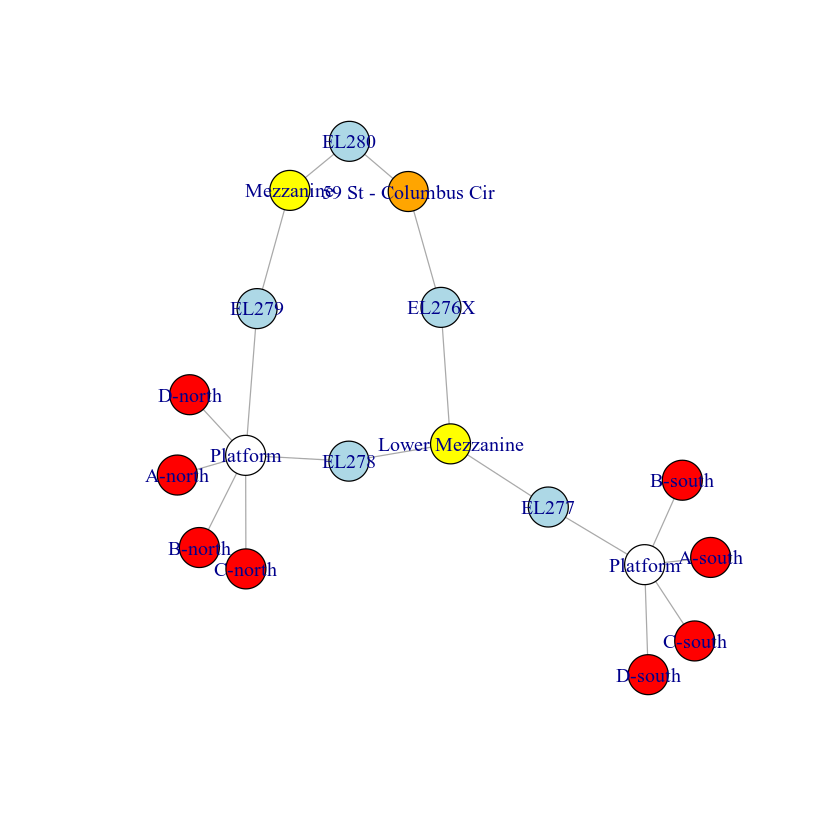

In [22]:
plot(h)

In [23]:
h_tmp <- delete_vertices(h,V(h)[V(h)$label == "EL396"])

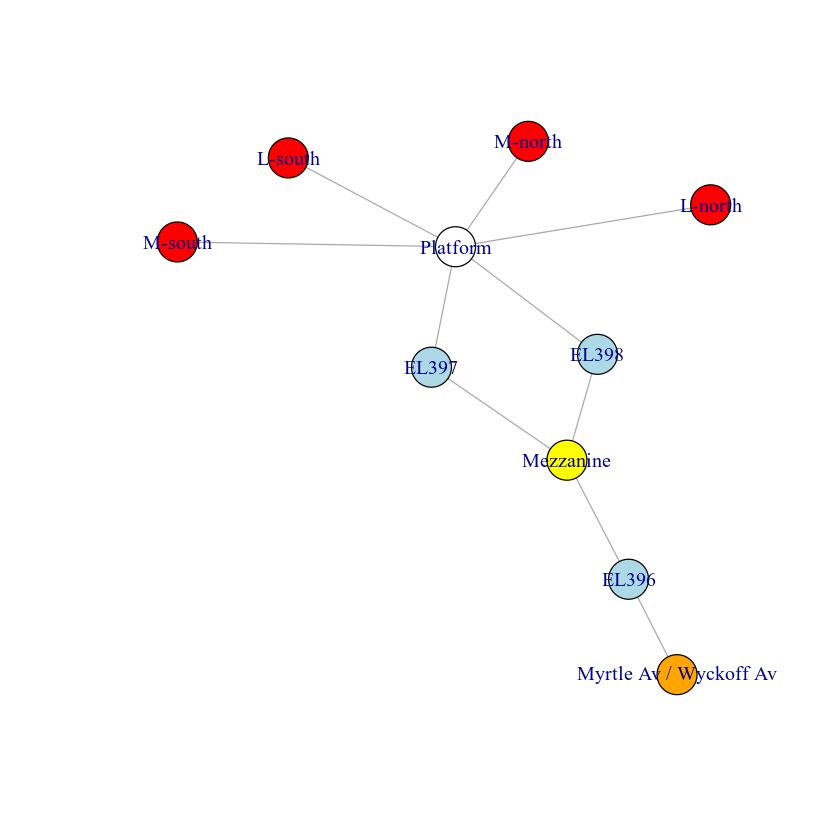

In [24]:
plot(induced_subgraph(el,subcomponent(el,V(el)[V(el)$label == "EL396"])))

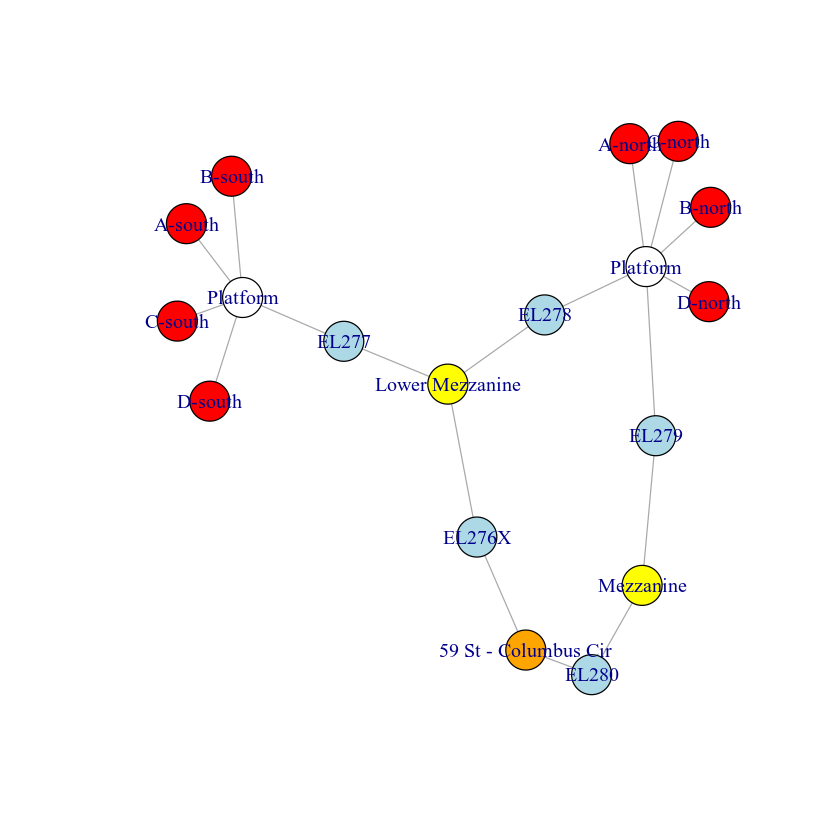

In [25]:
plot(h_tmp)

In [26]:
centr_betw(h)

$res
 [1] 13.5 76.5 21.5 58.0 60.0  0.0  0.0  0.0  0.0 10.5  9.5 71.5 17.5  0.0  0.0
[16]  0.0  0.0 53.5

$centralization
[1] 0.4260381

$theoretical_max
[1] 2312

In [27]:
routes <- read.csv('../../data/raw/google_transit/routes.txt',stringsAsFactors = F)

In [28]:
head(routes)

route_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
1,MTA NYCT,1,Broadway - 7 Avenue Local,"Trains operate between 242 St in the Bronx and South Ferry in Manhattan, at all times",1,http://web.mta.info/nyct/service/pdf/t1cur.pdf,EE352E,
2,MTA NYCT,2,7 Avenue Express,"Trains operate between Wakefield-241 St, Bronx, and Flatbush Av-Brooklyn College, Brooklyn, at all times. Trains operate local in Bronx and Brooklyn. Trains operate express in Manhattan except late night when it operates local.",1,http://web.mta.info/nyct/service/pdf/t2cur.pdf,EE352E,
3,MTA NYCT,3,7 Avenue Express,"Trains operate between 148 St, 7 Av, Manhattan, and New Lots Av, Brooklyn, at all times except late nights. During late nights, trains operate only in Manhattan between 148 St, 7 Av and Times Square-42 St.",1,http://web.mta.info/nyct/service/pdf/t3cur.pdf,EE352E,
4,MTA NYCT,4,Lexington Avenue Express,"Trains operate daily between Woodlawn/Jerome Av, Bronx, and Utica Av/Eastern Pkwy, Brooklyn, running express in Manhattan and Brooklyn. During late night and early morning hours, trains run local in Manhattan and Brooklyn, and extend beyond Utica Av to New Lots/Livonia Avs, Brooklyn.",1,http://web.mta.info/nyct/service/pdf/t4cur.pdf,00933C,
5,MTA NYCT,5,Lexington Avenue Express,"Weekdays daytime, most trains operate between either Dyre Av or 238 St-Nereid Av, Bronx, and Flatbush Av-Brooklyn College, Brooklyn. At all other times except during late nights, trains operate between Dyre Av, Bronx, and Bowling Green, Manhattan. During late nights trains operate only in the Bronx between Dyre Av and E 180 St/MorrisPark Av. Customers who ride during late night hours can transfer to 2 service at the E 180 St Station. At all times, trains operate express in Manhattan and Brooklyn. Weekdays, trains in the Bronx operate express from E 180 St to 149 St-3 Av during morning rush hours (from about 6 AM to 9 AM), and from 149 St-3 Av to E 180 St during the evening rush hours (from about 4 PM to 7 PM).",1,http://web.mta.info/nyct/service/pdf/t5cur.pdf,00933C,
5X,MTA NYCT,5X,Lexington Avenue Express,"Weekdays daytime, most trains operate between either Dyre Av or 238 St-Nereid Av, Bronx, and Flatbush Av-Brooklyn College, Brooklyn. At all other times except during late nights, trains operate between Dyre Av, Bronx, and Bowling Green, Manhattan. During late nights trains operate only in the Bronx between Dyre Av and E 180 St/MorrisPark Av. Customers who ride during late night hours can transfer to 2 service at the E 180 St Station. At all times, trains operate express in Manhattan and Brooklyn. Weekdays, trains in the Bronx operate express from E 180 St to 149 St-3 Av during morning rush hours (from about 6 AM to 9 AM), and from 149 St-3 Av to E 180 St during the evening rush hours (from about 4 PM to 7 PM).",1,http://web.mta.info/nyct/service/pdf/t5cur.pdf,00933C,


In [29]:
V(el)$color[V(el)$node_type=="Train"] <- paste0("#",routes$route_color[match(gsub("-.*","",V(el)$label[V(el)$node_type=="Train"]),routes$route_id)])

In [30]:
V(el)$color[V(el)$color == "#NA" | V(el)$color == "#"] <- 'grey'

In [31]:
# V(el)$component,V(el)$label

ERROR: Error in parse(text = x, srcfile = src): <text>:1:16: unexpected ','
1: V(el)$component,
                   ^


In [32]:
ee$station_name[ee$equipment_id %in% V(h)$label]

[1] "59 St - Columbus Cir" "59 St - Columbus Cir" "59 St - Columbus Cir"
[4] "59 St - Columbus Cir" "59 St - Columbus Cir"

In [33]:
directions <- c('south', 'north', 'manhattan', 'wakefield 241 st', 'woodlawn','norwood 205 st', 'jamaica', 'bay ridge','flatbush av brooklyn college', '637N, 637S',
                'brighton beach, coney island, bay ridge', 'coney island','coney island, brighton beach', 'jamaica center','flushing main st', 'flushing', 'jamaica, forest hills',
                'manhattan-bound', 'far rockaway', 'brighton beach/coney island')
dir_filter <- paste(paste0("-",directions,"|"),collapse="")

In [34]:
dir_filter

[1] "-south|-north|-manhattan|-wakefield 241 st|-woodlawn|-norwood 205 st|-jamaica|-bay ridge|-flatbush av brooklyn college|-637N, 637S|-brighton beach, coney island, bay ridge|-coney island|-coney island, brighton beach|-jamaica center|-flushing main st|-flushing|-jamaica, forest hills|-manhattan-bound|-far rockaway|-brighton beach/coney island|"

In [35]:
V(el)$clean_label <- gsub("METRO-NORTH","MNR",gsub(pattern=paste0(dir_filter,"Platform|Upper|Lower|Mezzanine"),'',V(el)$label))

In [36]:
station_components <- data.frame(component=V(el)$component,station=ee$station_name[match(V(el)$label,ee$equipment_id)],stringsAsFactors = F)

In [37]:
unique_stations <- unique(station_components$station)

In [38]:
unique_stations <- unique_stations[!is.na(unique_stations)]

In [41]:
for(x in unique_stations){
    comps <- unique(station_components$component[station_components$station == x])
    comps <- comps[!is.na(comps)]
    file_name <- gsub("_","_",gsub("[-/&_() ]+","_",x))
    png(paste0('../../reports/figures/elevator_maps/',file_name,'.png'),width = 1500,height = 1500)
    par(mfrow=c(length(comps),1))
    for(i in comps){
        g <- induced_subgraph(el,V(el)[V(el)$component == i])
        plot(g,vertex.size=8,vertex.label.degree=67.5,vertex.shape=ifelse(V(g)$node_type=='Train','square','circle'),vertex.label=gsub("-","\n",V(g)$label),vertex.label.cex=1.75,vertex.label.color='black',vertex.label.dist=-1.5,layout=layout_as_tree(g,root=V(g)[V(g)$node_type == "Street"]),main=unique(ee$station_name[ee$equipment_id %in% V(g)$label]))
    }
    dev.off()
}

In [40]:
unique_stations

[1] "125 St"                                
  [2] "135 St"                                
  [3] "14 St - 8 Av"                          
  [4] "14 St - Union Sq"                      
  [5] "149 St - 3 Av"                         
  [6] "161 St - Yankee Stadium"               
  [7] "168 St"                                
  [8] "175 St"                                
  [9] "179 St - Jamaica"                      
 [10] "181 St"                                
 [11] "190 St"                                
 [12] "191 St"                                
 [13] "207 St - Inwood"                       
 [14] "21 St - Queensbridge"                  
 [15] "23 St"                                 
 [16] "231 St"                                
 [17] "233 St"                                
 [18] "28 St"                                 
 [19] "34 St - Herald Sq"                     
 [20] "34 St - Hudson Yards"                  
 [21] "42 St - Bryant Park"                   
 [22] "42 St - Grand Central"                 
 [23] "47-50 St - Rockefeller Ctr"            
 [24] "49 St"                                 
 [25] "50 St"                                 
 [26] "51 St"                                 
 [27] "57 St - 7 Av"                          
 [28] "61 St - Woodside"                      
 [29] "66 St - Lincoln Center"                
 [30] "72 St"                                 
 [31] "72 St / 2 Av"                          
 [32] "74 St - Broadway / Roosevelt Av"       
 [33] "8 Av"                                  
 [34] "8 Av - 14 St"                          
 [35] "86 St"                                 
 [36] "86 St / 2 Av"                          
 [37] "96 St"                                 
 [38] "96 St / 2 Av"                          
 [39] "Aqueduct Racetrack"                    
 [40] "Atlantic Av-Barclays Ctr"              
 [41] "Bay Parkway"                           
 [42] "Borough Hall"                          
 [43] "Bowling Green"                         
 [44] "Briarwood/Van Wyck Blvd"               
 [45] "Brooklyn Bridge - City Hall"           
 [46] "Canal St"                              
 [47] "Chambers St"                           
 [48] "Church Av"                             
 [49] "Clark St"                              
 [50] "Coney Island Stillwell Av"             
 [51] "Court Square"                          
 [52] "Court St"                              
 [53] "Crown Hts - Utica Av"                  
 [54] "Dyckman St"                            
 [55] "East 180 St"                           
 [56] "Euclid Av"                             
 [57] "Far Rockaway - Mott Av"                
 [58] "Flatbush Av Brooklyn College"          
 [59] "Flushing Av"                           
 [60] "Flushing Main St"                      
 [61] "Fordham Rd"                            
 [62] "Forest Hills - 71 Av"                  
 [63] "Franklin Av"                           
 [64] "Fulton St"                             
 [65] "Gun Hill Rd"                           
 [66] "Hoyt Schermerhorn"                     
 [67] "Hunts Point"                           
 [68] "Jackson Hts - Roosevelt Av"            
 [69] "Jamaica - Van Wyck"                    
 [70] "Jamaica Center Parsons/Archer"         
 [71] "Jay St - MetroTech"                    
 [72] "Junction Blvd"                         
 [73] "Kew Gardens / Union Tpk"               
 [74] "Kings Highway"                         
 [75] "Kingsbridge Road"                      
 [76] "Lexington Av / 53 St"                  
 [77] "Marcy Av"                              
 [78] "Myrtle Av / Wyckoff Av"                
 [79] "New Utrecht"                           
 [80] "Ozone Park / Lefferts Blvd"            
 [81] "Pelham Bay Park"                       
 [82] "Pelham Pkwy"                           
 [83] "Prospect Park"                         
 [84] "Queens Plaza"                          
 [85] "Roosevelt Island"                      
 [86] "

In [588]:
subset <- c("34 St - Penn","72 St","161 St - Yankee Stadium")

In [598]:
for(x in subset){
    comps <- unique(station_components$component[station_components$station == x])
    comps <- comps[!is.na(comps)]
    file_name <- gsub("_","_",gsub("[-/&_() ]+","_",x))
    png(paste0('../../reports/figures/Samples/',file_name,'.png'),width = 1000,height = 1000)
    par(mfrow=c(length(comps),1))
    for(i in comps){
        g <- induced_subgraph(el,V(el)[V(el)$component == i])
        plot(g,vertex.size=8,vertex.label.degree=67.5,vertex.shape=ifelse(V(g)$node_type=='Train','square','circle'),vertex.label=gsub("-","\n",V(g)$label),vertex.label.cex=1.9,vertex.label.color='black',vertex.label.dist=-1.5,layout=layout_as_tree(g,root=V(g)[V(g)$node_type == "Street"]),main=unique(ee$station_name[ee$equipment_id %in% V(g)$label]))
#         plot(g,vertex.size=8,vertex.label.degree=67.5,vertex.label=gsub("-","\n",V(g)$label),vertex.label.cex=1.9,vertex.label.color='black',vertex.label.dist=-1.5,layout=layout_in_circle(g),main=unique(ee$station_name[ee$equipment_id %in% V(g)$label]))
    }
    dev.off()
}

In [654]:
sg = read_graph('../../data/processed/mta-elevators.graphml',format = "graphml")
el_info <- read.csv('../../data/interim/crosswalks/EE_master_list.csv',stringsAsFactors = F)

In [655]:
V(sg)$component <- components(sg)$membership
V(sg)$station_name <- el_info$station_name[match(V(sg)$label,ee$equipment_id)]

for(i in unique(V(sg)$component)){
    st <- unique(V(sg)$station_name[V(sg)$component == i])
    V(sg)$station_name[V(sg)$component == i] <- st[!is.na(st)]
}

In [656]:
head(V(sg)$id,10)

[1] "Street-125 St"                                  
 [2] "Mezzanine-125 St"                               
 [3] "EL125"                                          
 [4] "EL142"                                          
 [5] "Platform-125 St-A-south/D-south/B-south/C-south"
 [6] "EL143"                                          
 [7] "125 St-A-south"                                 
 [8] "125 St-D-south"                                 
 [9] "125 St-B-south"                                 
[10] "125 St-C-south"

In [657]:
head(V(sg)$label,10)

[1] "125 St"    "Mezzanine" "EL125"     "EL142"     "Platform"  "EL143"    
 [7] "A-south"   "D-south"   "B-south"   "C-south"

In [658]:
leaf_nodes = data.frame(station_name=V(sg)$station_name[V(sg)$node_type=="Train"],label=V(sg)$label[V(sg)$node_type=="Train"],stringsAsFactors = F)
leaf_nodes$label <- gsub("METRO-NORTH","METRO_NORTH",leaf_nodes$label)

In [669]:
leaf_nodes[315,'label'] <- "Q-coney island"
leaf_nodes[315,'line'] <- "Q"

In [671]:
split_label <- strsplit(leaf_nodes$label,split = "-")

In [672]:
leaf_nodes$line <- sapply(split_label,FUN=function(x) return(x[[1]]))
leaf_nodes$direction <- sapply(split_label,FUN=function(x) return(x[[2]]))

In [673]:
head(leaf_nodes)

station_name,label,line,direction
<chr>,<chr>,<chr>,<chr>
125 St,A-south,A,south
125 St,D-south,D,south
125 St,B-south,B,south
125 St,C-south,C,south
125 St,5-south,5,south
125 St,4-north,4,north


In [674]:
write.csv(leaf_nodes,file='../../data/interim/platform_nodes.csv',row.names=FALSE)

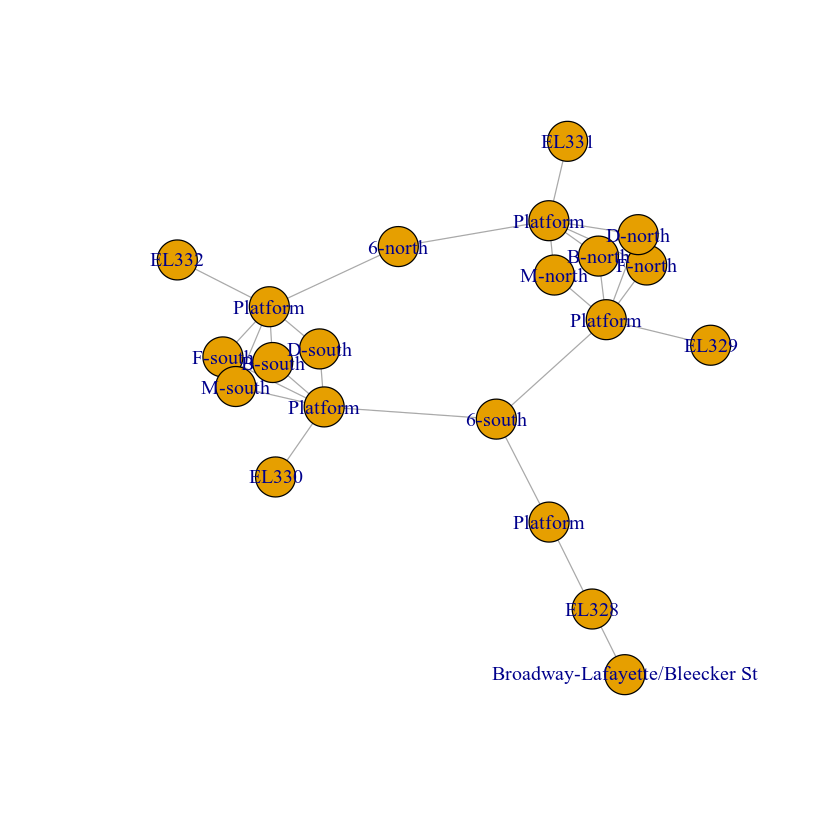

In [650]:
kh <- induced_subgraph(sg,V(sg)[V(sg)$station_name == "Broadway-Lafayette/Bleecker St"])
plot(kh)

In [649]:
V(sg)$station_name[grepl("Lafayette",V(sg)$station_name)]

[1] "Broadway-Lafayette/Bleecker St" "Broadway-Lafayette/Bleecker St"
 [3] "Broadway-Lafayette/Bleecker St" "Broadway-Lafayette/Bleecker St"
 [5] "Broadway-Lafayette/Bleecker St" "Broadway-Lafayette/Bleecker St"
 [7] "Broadway-Lafayette/Bleecker St" "Broadway-Lafayette/Bleecker St"
 [9] "Broadway-Lafayette/Bleecker St" "Broadway-Lafayette/Bleecker St"
[11] "Broadway-Lafayette/Bleecker St" "Broadway-Lafayette/Bleecker St"
[13] "Broadway-Lafayette/Bleecker St" "Broadway-Lafayette/Bleecker St"
[15] "Broadway-Lafayette/Bleecker St" "Broadway-Lafayette/Bleecker St"
[17] "Broadway-Lafayette/Bleecker St" "Broadway-Lafayette/Bleecker St"
[19] "Broadway-Lafayette/Bleecker St" "Broadway-Lafayette/Bleecker St"
[21] "Broadway-Lafayette/Bleecker St"

In [517]:
?png

png {grDevices},R Documentation
filename,"the name of the output file. The page number is substituted if a C integer format is included in the character string, as in the default. (The result must be less than PATH_MAX characters long, and may be truncated if not. See postscript for further details.) Tilde expansion is performed where supported by the platform."
width,the width of the device.
height,the height of the device.
units,"The units in which height and width are given. Can be px (pixels, the default), in (inches), cm or mm."
pointsize,"the default pointsize of plotted text, interpreted as big points (1/72 inch) at res ppi."
bg,"the initial background colour: can be overridden by setting par(""bg"")."
quality,"the ‘quality’ of the JPEG image, as a percentage. Smaller values will give more compression but also more degradation of the image."
compression,"the type of compression to be used. Ignored for type = ""quartz""."
res,"The nominal resolution in ppi which will be recorded in the bitmap file, if a positive integer. Also used for units other than the default, and to convert points to pixels."
...,"for type = ""Xlib"" only, additional arguments to the underlying X11 device such as fonts or family. For types ""cairo"" and ""quartz"", the family argument can be supplied. See the ‘Cairo fonts’ section in the help for X11."
